<strong><font size="+3">Introduction </font></strong>

The purpose of this note is to provide a quick-and-dirty guide to the Reconstruction module, along with a short technical overview and a few examples.

Data-based model building can be separated into two basic parts, given some data $\vec x$.

1) Reconstruction, or a mapping from $\vec{x} \rightarrow \vec{y} $. The intuition for this mapping is that $\vec{x}$ may not live in the "native" space of the dynamics underlying the system; by taking $\vec{x}$ to some new coordinate space, a simpler or more predictive set of governing equations--"the dynamic"--can be realized. One common example is "taking the lags," wherein a single timepoint is "lifted" into a higher-dimensional space.<br>
2) Equations of Motion Recovery, which itself consists of two parts: basis selection and coefficient solution. The intuition here is that we try to fit some line to the data, balancing goodness-of-fit against model complexity, or number of terms.

Here we are concerned only with the reconstruction step: taking the data to some higher-or-lower-dimensional space to explore and improve model performance. 

Let's start by importing "reconstruction:"

In [1]:
from reconstruction import *

<strong><font size="+3">The Reconstruction Class </font></strong>

The most essential attributes of a "reconstruction" object are its "ID," "reconstructionFunction," and "otherArgs." The "ID" is primarily used for saving "reconstruction" objects. The "reconstructionFunction" is a user-specified function which takes a "dataset" object AND (necessarily) catch-all "otherArguments" to help specify the reconstruction.

For the purpose of example, let's say we have some time series of 1-D data $x$. I'll put this data in a dataset.

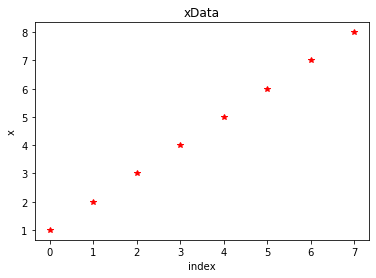

In [2]:
x = [[1],[2],[3],[4],[5],[6],[7],[8]]
xDatasetID = 'xData'
xDatasetCompNames = ['x']
xDataset = dataset(x,xDatasetID,xDatasetCompNames)
xDataset.plot(['x'])

Perhaps I think that a more natural representation for my data lives in the space $y=x+1$. I can define a 'reconstructionFunction,' 'justAdd1,' which will return this $y$, then put it in a 'reconstruction' object for future use.

In [3]:
def justAdd1(datasetObj,otherArgs):
    recDataName = datasetObj.ID + '_butAdd1'
    recData = [[value + 1 for value in datapoint ] for datapoint in datasetObj.data]
    recCompNames = ['y' + str(i) for i in range(len(datasetObj.data[0]))]
    datasetToReturn = dataset(recData,recDataName,recCompNames)
    datasetToReturn.dt = datasetObj.dt
    return datasetToReturn

myReconstruction = reconstruction(justAdd1,'Add1ToAllElems')

I can now use the 'reconstruct' function to reconstruct a "dataset" for $y$ given our dataset for $x$.

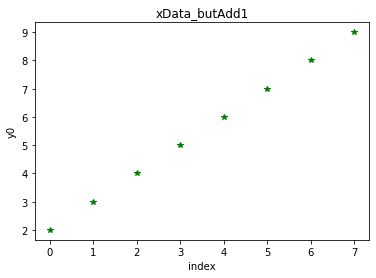

In [4]:
yDataset = myReconstruction.reconstruct(xDataset)
yDataset.color = 'green'
yDataset.plot([0])

The data has been shifted up by 1. A 'reconstruction' has two further time-saving functions: 'info' and 'save.' 

In [5]:
myReconstruction.info()

Reconstruction ID: Add1ToAllElems


In [6]:
myReconstruction.save('reconstruction_example')

We can also load a previously-saved reconstruction. This is particularly useful for neural-net-based reconstructions; you don't have to train the net every time!

In [7]:
loadedReconstruction = loadReconstruction('reconstruction_example')
loadedReconstruction.info()

Reconstruction ID: Add1ToAllElems


<strong><font size="+3">Cooler Example</font><strong>

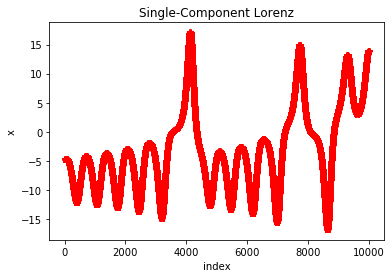

In [8]:
from dataGeneration import loadDataGenerator
lorenzAttractor = loadDataGenerator('Lorenz_Typical')
lorenzData = lorenzAttractor.evolve(10000,[1,1,1])
lorenzDataset = dataset(lorenzAttractor.evolve(10000,[1,1,1]),'Single-Component Lorenz','x',dt=.01)
lorenzDataset.data = lorenzDataset.switchDataIndices([lorenzDataset.compData[0]])
lorenzDataset.plot([0])

Here we have in our dataset only the x component of 3-D data generated by the Lorenz system. I'd like to look not only at the data, but its first two derivatives. Let's make a reconstruction to do this.

In [9]:
firstTwoDerivsReconstruction = reconstruction(reconstructOriginalAndNDerivatives,'First Two Derivatives',2,.01)

Feeding this reconstruction my lorenz dataset yields the appropriate reconstructed data, which I can plot:

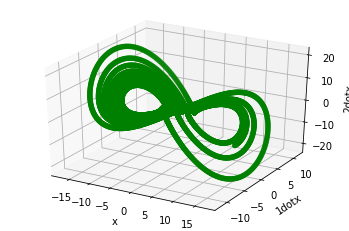

In [10]:
singleCompWithDerivs = firstTwoDerivsReconstruction.reconstruct(lorenzDataset)
singleCompWithDerivs.color = 'green'
singleCompWithDerivs.plot([0,1,2])

This concludes our overview of reconstruction and reconstruction objects. Up next, the holy grail: prediction!